In [0]:
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df = pd.read_csv("finaln50.csv")

#print the head
df.dropna(inplace=True)
df.head()



,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,4675.799805,4773.100098,4675.799805,4765.299805,4765.299805,0.0
1,2012-01-04,4774.950195,4782.850098,4728.850098,4749.649902,4749.649902,0.0
2,2012-01-05,4749.000000,4779.799805,4730.149902,4749.950195,4749.950195,0.0
3,2012-01-06,4724.149902,4794.899902,4686.850098,4754.100098,4754.100098,0.0
5,2012-01-09,4747.549805,4758.700195,4695.450195,4742.799805,4742.799805,0.0


In [0]:
from fbprophet import Prophet

df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#sorting
data = df.sort_index(ascending=True, axis=0)

#creating dataframe
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

new_data['Date'] = pd.to_datetime(new_data.Date,format='%Y-%m-%d')
new_data.index = new_data['Date']

#preparing data
new_data.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)

#train and validation
train = new_data[:1711]
valid = new_data[1711:1811]

#fit the model
model = Prophet()
model.fit(train)

#predictions
close_prices = model.make_future_dataframe(periods=len(valid))
forecast = model.predict(close_prices)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
forecast_valid = forecast['yhat'][1711:1811] ##not considering the June month value
rms=np.sqrt(np.mean(np.power((np.array(valid['y'])-np.array(forecast_valid)),2)))
rms

435.0509899584092

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



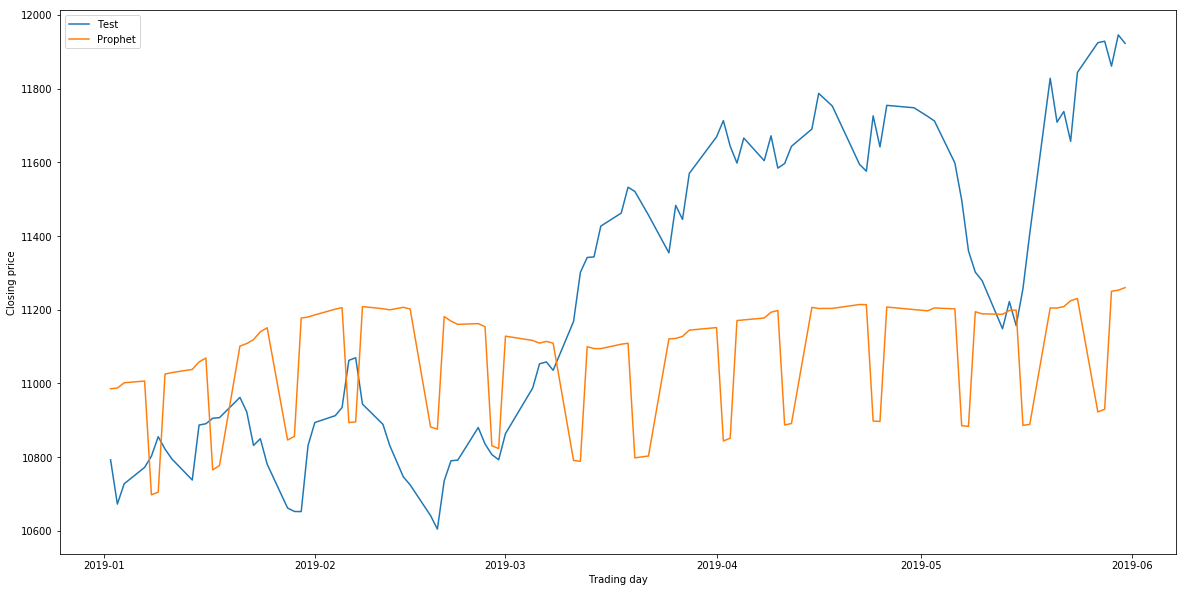

In [0]:
valid['Predictions'] = 0
valid['Predictions'] = forecast_valid.values

plt.ylabel('Closing price')
plt.xlabel('Trading day')
plt.plot(valid['y'],label='Test')
plt.plot(valid['Predictions'],label='Prophet')
plt.legend(loc='best')